In [1]:
from matplotlib import pyplot as plt
from PIL import Image
import torchvision 
import torch
import warnings
warnings.filterwarnings("ignore")

In [2]:
newresnet18 = torch.load('resnet18-98perc.pth')
newresnet18.eval()
img = Image.open('pn.png').convert('RGB')

In [3]:
tfms = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size = (224, 224)),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
])

tensor_image = tfms(img)
print(type(tensor_image))

tensor_image = tensor_image.unsqueeze(0)
tensor_image.shape

<class 'torch.Tensor'>


torch.Size([1, 3, 224, 224])

Predicted Class :  viral


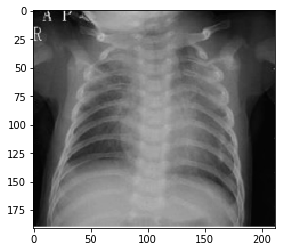

In [4]:
output = newresnet18(tensor_image)
_, preds = torch.max(output, 1)
class_names = ['normal', 'viral', 'covid']
plt.imshow(img)
print("Predicted Class : ", class_names[preds])